In [1]:
import matplotlib.pyplot as plt
import numpy as np
from   sklearn.cluster import KMeans

%matplotlib inline

In [2]:
image = plt.imread('/Users/dongmeichen/Documents/All/jobs/contract-based/ELAW/sentinel2/2016.png')

In [3]:
image.shape

(7804, 4559, 4)

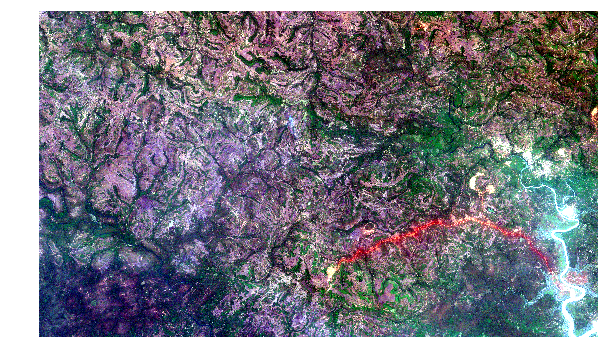

In [4]:
plt.figure(figsize=(12, 6))
plt.imshow(np.rot90(image))
plt.axis('off');

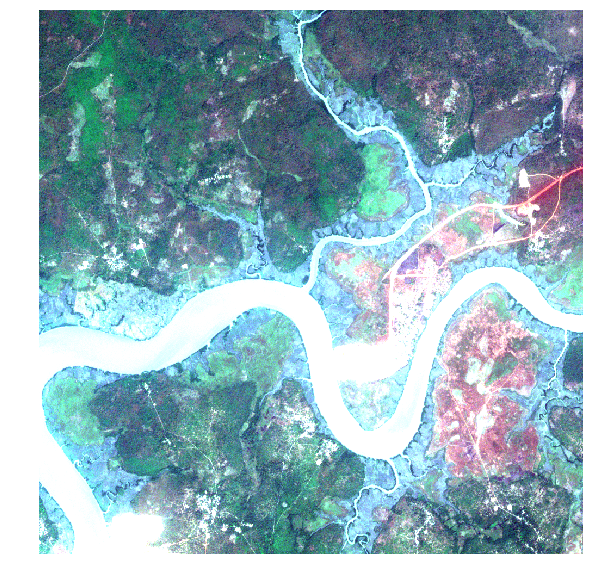

In [5]:
crop = image[-1000:, :1000, :3]
plt.figure(figsize=(10, 10))
plt.imshow(crop)
plt.axis('off');

In [6]:
crop.shape

(1000, 1000, 3)

In [7]:
crop = crop / crop.max()

In [8]:
def reduce_colors(image, n_vals_per_channel=5):
    img = image.copy()
    img = img.reshape(-1)
    allowable = list(
        np.linspace(0, 1, n_vals_per_channel, endpoint=False)
    ) + [1]
    for i, p in enumerate(img):
        for c in range(1, n_vals_per_channel):
            if p <= allowable[c]:
                img[i] = allowable[c]
                break
    return img.reshape(image.shape)

In [9]:
crop_3 = reduce_colors(crop, 3)

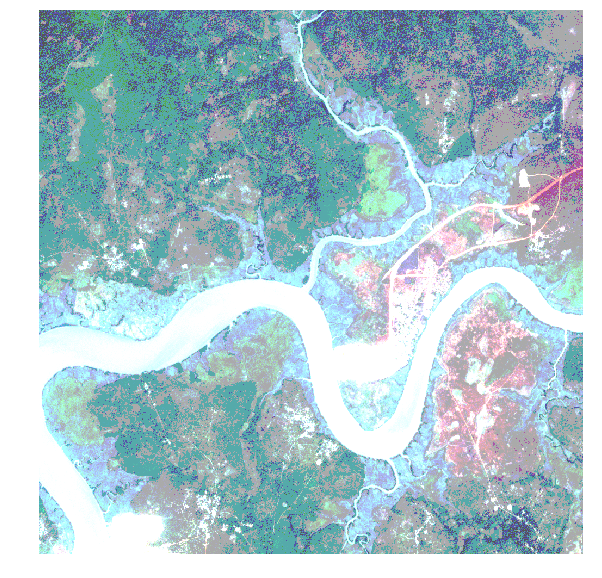

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(crop_3)
plt.axis('off');

In [11]:
X = crop.reshape(-1, 3)
X.shape

(1000000, 3)

In [12]:
N_CLASS = 5

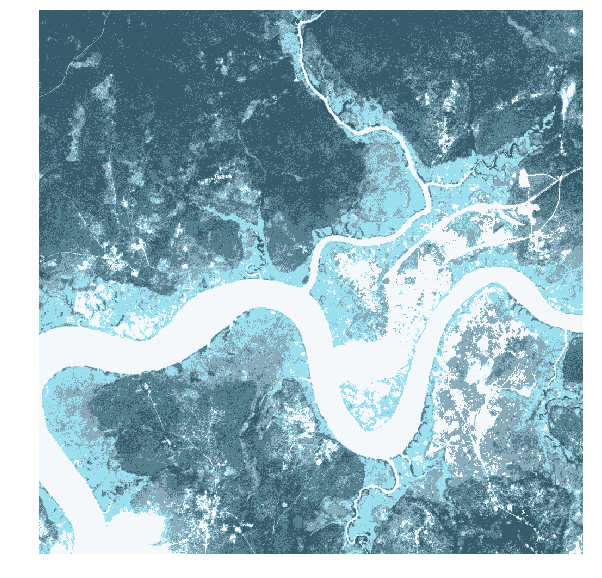

In [13]:
kmeans = KMeans(n_clusters=N_CLASS).fit(X)
seg_img = kmeans.cluster_centers_[kmeans.labels_].reshape(crop_3.shape)
plt.figure(figsize=(10, 10))
plt.imshow(seg_img)
plt.axis('off');

In [14]:
def artificial_color(image):
    img = image.copy()
    img = img.reshape(-1)
    replace = {c: np.random.rand() for c in set(img)}
    img = np.array([replace[c] for c in img])
    img = img.reshape(image.shape)
    return img

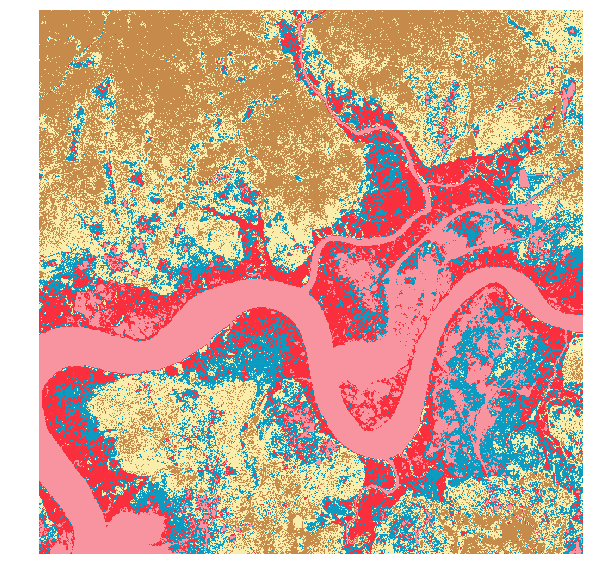

In [15]:
colorized = artificial_color(seg_img)
plt.figure(figsize=(10, 10))
plt.imshow(colorized)
plt.axis('off');

In [20]:
image = image / image.max()

In [29]:
image = image[:, :, :3]
X = image.reshape(-1, 3)
X.shape

(35578436, 3)

In [30]:
import time
t0 = time.time()
image_3 = reduce_colors(image, 3)
t1 = time.time()
print(t1-t0)

505.48645305633545


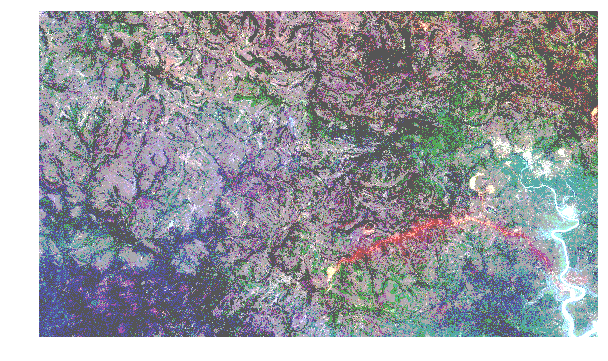

In [31]:
plt.figure(figsize=(12, 6))
plt.imshow(np.rot90(image_3))
plt.axis('off');

In [33]:
kmeans = KMeans(n_clusters=N_CLASS).fit(X)
seg_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image_3.shape)

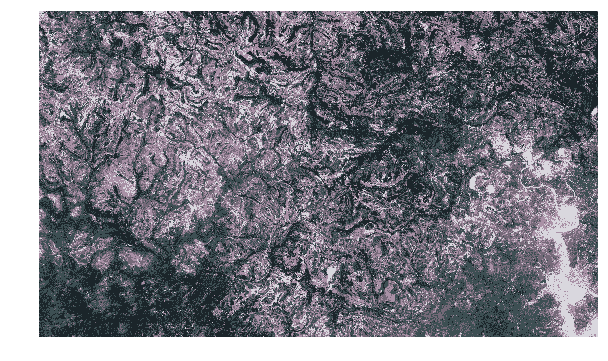

In [34]:
plt.figure(figsize=(12, 6))
plt.imshow(np.rot90(seg_img))
plt.axis('off');

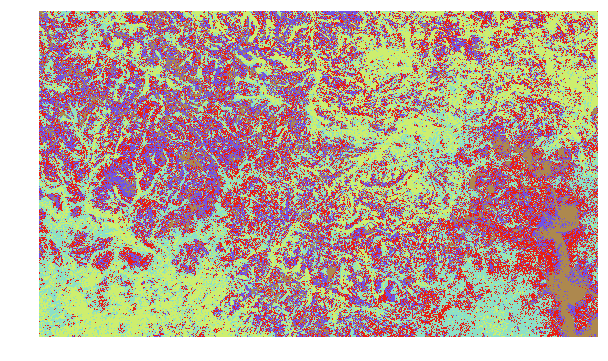

In [35]:
colorized = artificial_color(seg_img)
plt.figure(figsize=(12, 6))
plt.imshow(np.rot90(colorized))
plt.axis('off');